# Weekly assignments (week 1-3):


# Weekly assignment 1: exploratory data analysis

In this assignment we're going to merge two datafiles, clean them and explore the relations between the variables.

In [35]:
#importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr

/var/folders/35/jr01gy094t52qpknnm7pw_d00000gn/T/ipykernel_71622/3456232725.py:10: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


### Get the data

In [36]:

# read the data set - taking into account separators
steps = pd.read_csv("steps.csv", sep=";")
survey = pd.read_csv("survey.csv")

View 5 first rows of the files to find common column

In [37]:
# data set preview 10 first rows
steps.head(5)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# data set preview 5 first rows
survey.head(5)

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [39]:
# merge two data sets- commmon column is "id"
df = survey.merge(steps, on="id")
df

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyzing a quantitative variable 

Inspecting variable weight. 

In [40]:
# get info on mean, std etc 
df["weight"].describe()  

count    927.000000
mean      72.833873
std       25.902717
min        6.000000
25%       61.000000
50%       71.000000
75%       81.000000
max      700.000000
Name: weight, dtype: float64

Let's see the weight distribution of participants


/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


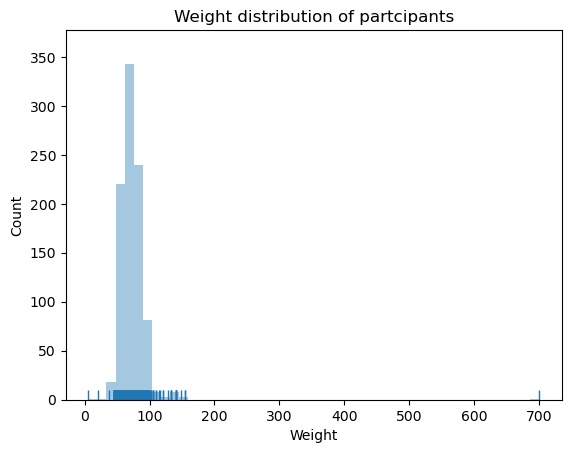

In [41]:
sns.distplot(df["weight"].dropna(), rug=True, kde=False) #Selecting the weight column. I need to drop the NA's for the plot
plt.title("Weight distribution of partcipants")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

As seen above there might be some implausible values (like 700 kg) in weight therefore decided to visualise height as well to inspect 

/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


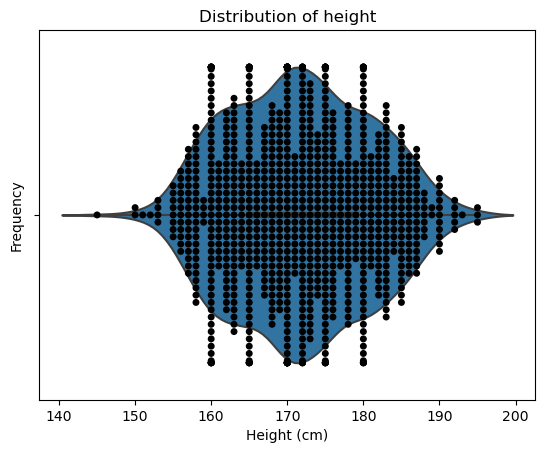

In [42]:
sns.violinplot(df['height'])
sns.swarmplot(df['height'], color='black') 
plt.title('Distribution of height')
plt.ylabel('Frequency')
plt.xlabel('Height (cm)')
plt.show()

Removing impossible values for weight (implausible values - too low and too high) and height (too low)

### Remove impossible values - cleaning 

Cleaning the data

In [43]:
#include only weight thats seems possible let's say above 30 and below 200 
df = df[(df["weight"] < 200) & (df["weight"] > 30)]
# Replace all NANs with a zero to eliminate empty values.
df = df.fillna(0)


/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


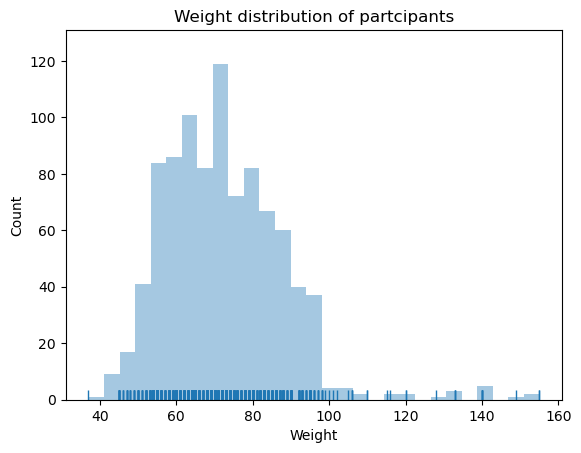

In [44]:
sns.distplot(df["weight"], rug=True, kde=False) 
plt.title("Weight distribution of partcipants")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


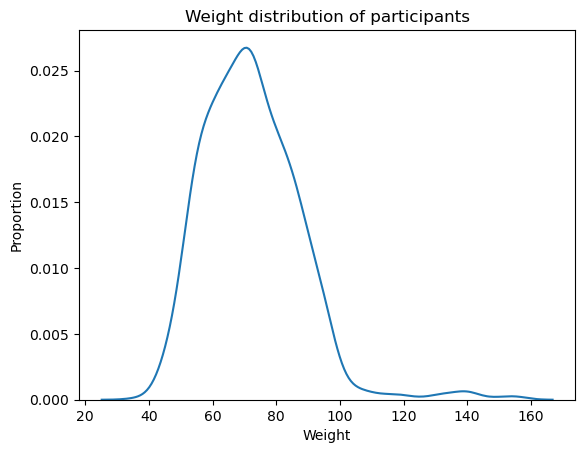

In [45]:
sns.distplot(df["weight"], hist=False, kde=True) #No histogram
plt.title("Weight distribution of participants")
plt.xlabel("Weight")
plt.ylabel("Proportion")
plt.show()


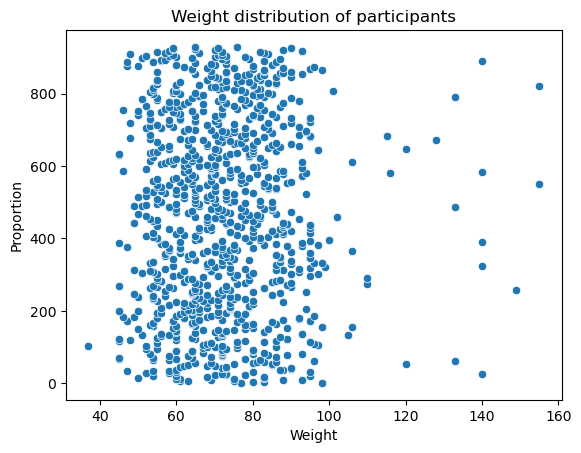

In [46]:
sns.scatterplot(x="weight", y="id", data=df) #No histogram
plt.title("Weight distribution of participants")
plt.xlabel("Weight")
plt.ylabel("Proportion")
plt.show()



In [47]:
# calculate statistics for variable weight

print("median: " + str(float(df[["weight"]].median())))
print("mode: " + str(df[["weight"]].mode()["weight"][0]))
print("mean: " + str(float(df[["weight"]].mean())))
print("standard deviation: " + str(float(df[["weight"]].std())))
print("variance: " + str(float(df[["weight"]].var())))

median: 71.0
mode: 72.0
mean: 72.28463203463204
standard deviation: 15.453636729374718
variance: 238.81488816347937



We can characterize the distribution as follows:
* Normality: The distribution is somewhat normal
* Variation: Low. Most values are between 50 and 90.
* Modality: bimodal (two peaks), this can be seen clearly on the histogram and is somewhat no repressented in the density plot. 
* Skewness: Slightly left skew.
* Outliers: There's few but I think it's still acceptable?

### Mean steps per participant

In [48]:
mean_steps= df.loc[:, "20-6-2013":"13-5-2014"].mean(axis=0) # : to go through all rows, get the mean over the columns with dates

# show the 5 rows of the resulting data frame
mean_steps.head() 

20-6-2013      94.608225
21-6-2013    2342.581169
22-6-2013    3238.246753
23-6-2013    2357.580087
24-6-2013    3070.409091
dtype: float64

## Exploratory data analysis

An analysis of distibution of mean steps per all participants overtime

making a plot using seaborn (sns)

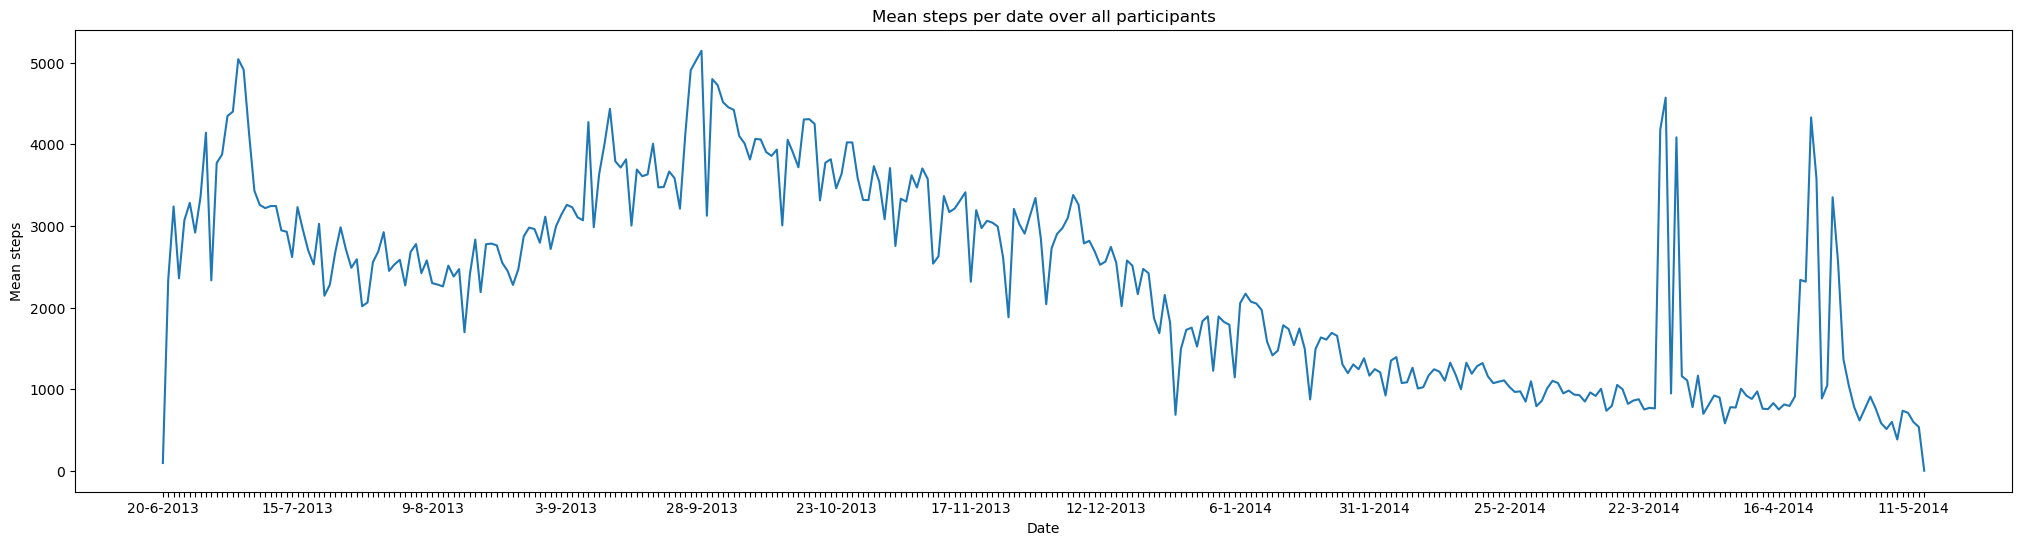

In [49]:
# I would've never figure it out if I didn't find Jonas' materials! This part was quite challanging.

plt.figure(figsize=(25, 6)) #set the figure ("canvas") size
plot = sns.lineplot(x=mean_steps.index, y=mean_steps) #create the plot


for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 25 == 0:  # every 25th label is kept
                label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("Mean steps per date over all participants") #set the title
plt.xlabel("Date") #set the x-label
plt.ylabel("Mean steps") #set the y-label

plt.show() #show the plot


### Mean steps per participant
Adding a new column to store the mean steps per participant in the data frame

In [50]:
df["mean_steps"] = df.loc[:, "20-6-2013":"13-5-2014"].mean(axis=1)
df

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5133.875000
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2826.371951
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,3745.902439
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.536585
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,874.557927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1742.908537
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,731.689024
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6268.954268
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3872.115854


/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


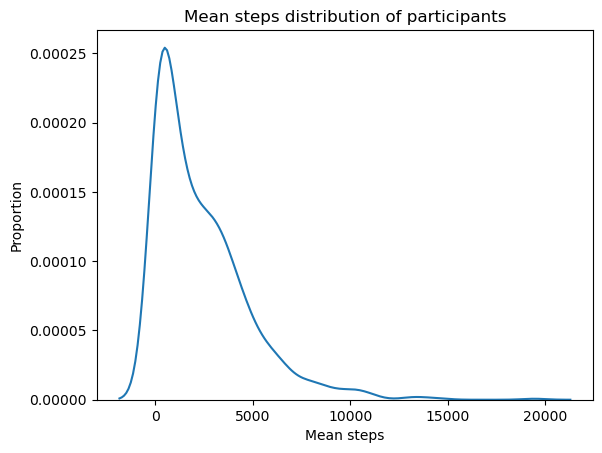

In [51]:
sns.distplot(df["mean_steps"], hist=False, kde=True) #No histogram
plt.title("Mean steps distribution of participants")
plt.xlabel("Mean steps")
plt.ylabel("Proportion")
plt.show()


Cleaning the mean steps data - removing inplausible values

In [52]:
df["mean_steps"].mask(df["mean_steps"].between(60000, 250000), inplace=True) 
df["mean_steps"].mask(df["mean_steps"].between(0, 50), inplace=True) 



Visualising mean steps distrubution again

/Users/paulinagdaniec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


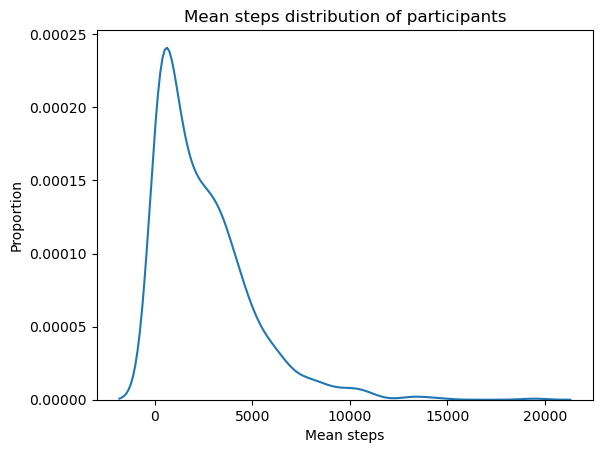

In [53]:
sns.distplot(df["mean_steps"], hist=False, kde=True) #No histogram
plt.title("Mean steps distribution of participants")
plt.xlabel("Mean steps")
plt.ylabel("Proportion")
plt.show()

In [54]:
df["mean_steps"].describe() 

count      873.000000
mean      2483.003454
std       2415.439493
min         50.756098
25%        558.798780
50%       1920.256098
75%       3622.432927
max      19430.237805
Name: mean_steps, dtype: float64

In [55]:

# calculate statistics for variable mean steps

print("median: " + str(float(df[["mean_steps"]].median())))
print("mode: " + str(df[["mean_steps"]].mode()["mean_steps"][0]))
print("mean: " + str(float(df[["mean_steps"]].mean())))
print("standard deviation: " + str(float(df[["mean_steps"]].std())))
print("variance: " + str(float(df[["mean_steps"]].var())))

median: 1920.2560975609756
mode: 50.75609756097561
mean: 2483.0034538876293
standard deviation: 2415.4394927661156
variance: 5834347.94321423


We can characterize the distribution as follows:
* Normality: the distribution is somewhat normal (it is slightly right-skewed)
* Variation: there is quite some variation. Most values are between 400 and 850.
* Modality: there is one peak
* Skewness: the distribution is skewed to the right
* Outliers: there are no significant outliers 

### The relation of mean_steps with two categorical variables: gender and education


To have a better view first let's look at the gender and age represantation.

In [56]:
# absolute table
pd.crosstab(df["age"], df["gender"], margins=True)

gender,Female,Male,All
age,,,
25-34,182,243,425
35-44,87,88,175
45-54,81,66,147
55-64,22,24,46
65+,1,6,7
<25,58,66,124
All,431,493,924


In this sample there is 59 males more than females. Both males (243 out of 494) and females (183 out of 435) were overrepresented in the ratio 25-34 years old and underrepressented in older as well as younger age groups. It seems that people in the 25-34 age group were more inclided to participate in the challange than other age groups (can also be many other factors like access to technology, data literacy etc.)

### The relation of mean_steps with gender and education

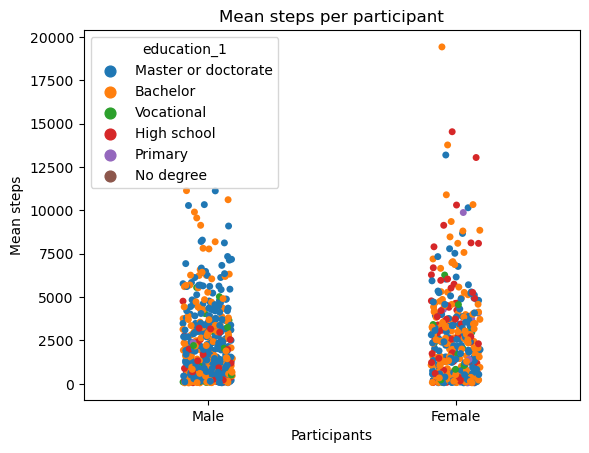

In [57]:
sns.stripplot(y="mean_steps", x="gender", hue="education_1", data=df)
plt.title("Mean steps per participant")
plt.ylabel("Mean steps")
plt.xlabel("Participants")
plt.show()


### Description:




For the Male participants a majority has a "Master or doctorate" background. For females the amount of "Bachelor" stands out as well as the amount of "Master or doctorate" even though lower than bachelor.
Male peaks are represented by "Bachelor" and "Master or doctorate" education. Female peaks are represented by "Bachelor" and "High school".

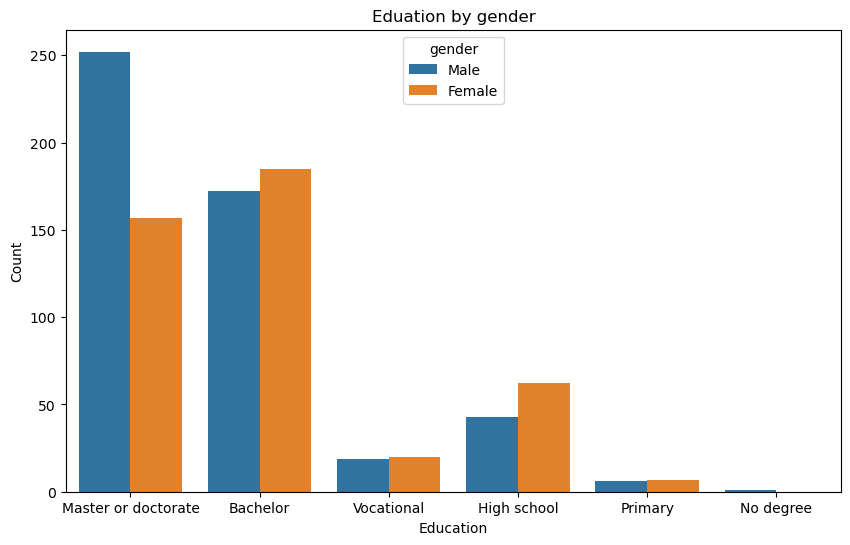

In [58]:
plt.figure(figsize=(10, 6)) #set the figure ("canvas") size
plot = sns.countplot(data = df, x = "education_1", hue = "gender") #create the plot
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Eduation by gender")
plt.show()

This visualisation shows that there is more men (250) with master or doctorate than women (160). Moreover, there is more slightly more woman with Bachelor degree then men, similiar in vocational/high school/primary. On teh pother hand there was more men with no degree in comparison to woman in this sample. 

# week 2

### Make a scatterplot martix of the numerical variables

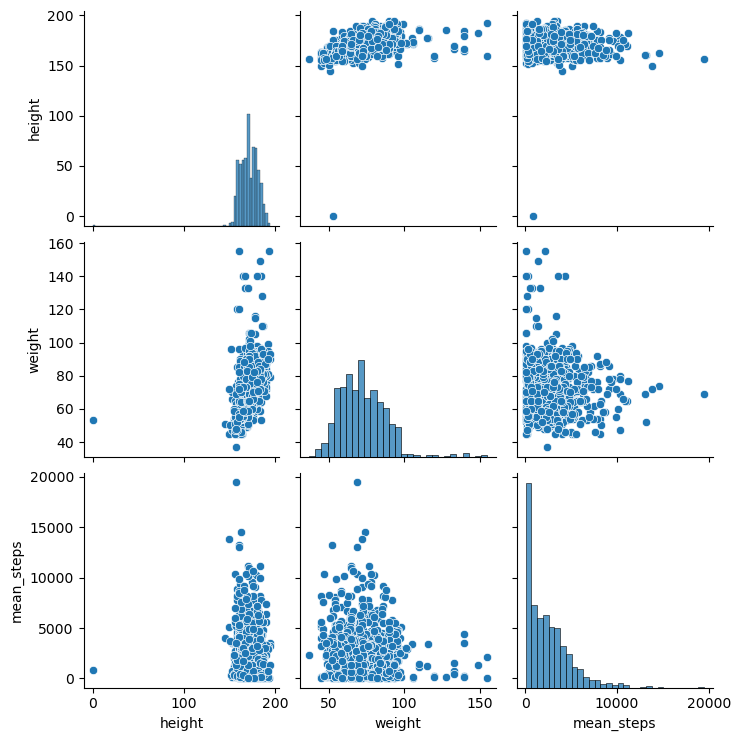

In [59]:
variables = df[["height", "weight", "mean_steps"]] #make selection
sns.pairplot(variables)#create scatterplot matrix
plt.show()

### Make a correlation martix of the numerical variables

Now let's zoom in on two relations. We'll use height as our independent variable.

In [60]:
corr = df[['mean_steps', 'weight', 'height']].corr()
corr

,mean_steps,weight,height
mean_steps,1.000000,-0.088815,-0.055431
weight,-0.088815,1.000000,0.454078
height,-0.055431,0.454078,1.000000


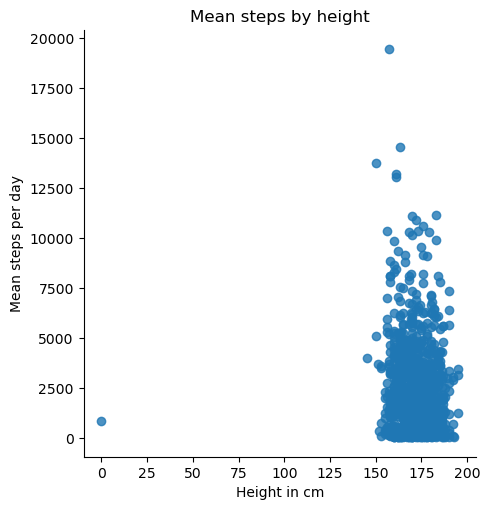

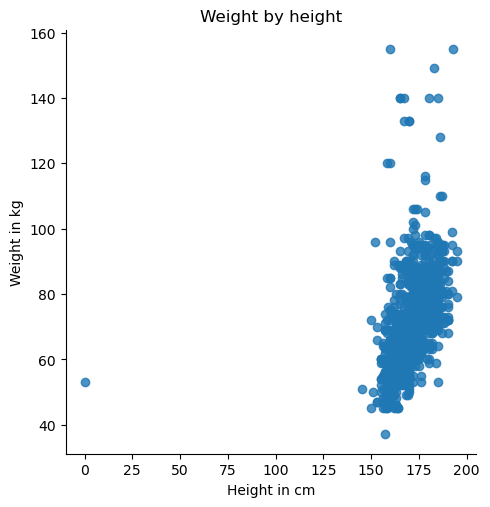

In [61]:
# Mean steps by height
sns.lmplot(x='height', y='mean_steps', fit_reg=False, data=df)
plt.xlabel('Height in cm') 
plt.ylabel('Mean steps per day')
plt.title('Mean steps by height')
plt.show()

# Weight by height
sns.lmplot(x='height', y='weight', fit_reg=False, data=df)
plt.xlabel('Height in cm') 
plt.ylabel('Weight in kg')
plt.title('Weight by height')
plt.show()

Now to the correlations:


In [62]:
variables = variables.dropna() #I will drop the rows with NA, otherwise pearsonr won't work
print(pearsonr(variables['height'], variables['mean_steps']))
print(pearsonr(variables['height'], variables['weight']))

PearsonRResult(statistic=-0.055431057860879956, pvalue=0.1016911431580955)
PearsonRResult(statistic=0.44793984183080277, pvalue=2.6336449955192117e-44)


In [63]:
corr = df[["mean_steps", "height", "weight"]].corr()
corr

,mean_steps,height,weight
mean_steps,1.000000,-0.055431,-0.088815
height,-0.055431,1.000000,0.454078
weight,-0.088815,0.454078,1.000000


To summarize our findings:

Both relations are linear. The points are around a straight line, with no clear curvature.
There is a neglible negative correlation between height and mean steps. This correlation is significant.
There is a moderate positive correlation between height and weight. This correlation is significant.

## week 3


## Predictive model

### What is a linear regression? 

A line that shows the correlation of the independent variables with the dependent variable 

Let's see if we can find a relation between mean_steps and weight. Let's first plot the relation. Weight is our independent variable, Mean steps our dependent variable.

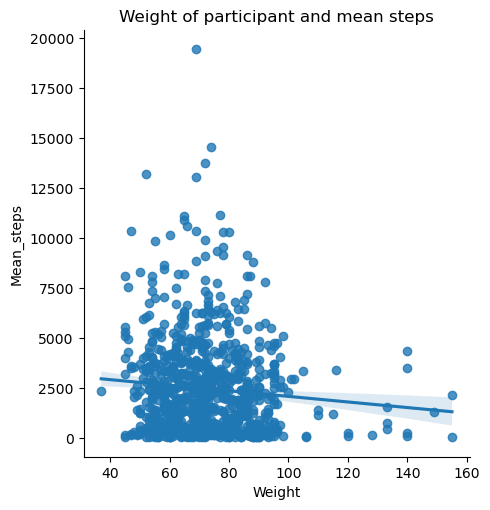

In [64]:
sns.lmplot(x='weight', y='mean_steps', fit_reg=True, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Weight')
plt.ylabel('Mean_steps')
plt.title('Weight of participant and mean steps')
plt.show()

1. The data seem to fit a linear pattern: you can draw a straight line to fit the points
2. However, there is quite a bit of variation around this line. Some points will be above it, some below.
3. This variation seems to decrease the higher the weight of the participant.
4. Outliers: 60000 steps seems quite far compared to the rest of data.

### Create dummy variables for the categorical variables

In [65]:
df.dropna()
dfDummies = pd.get_dummies(df)
dfDummies

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,age_45-54,age_55-64,age_65+,age_<25,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,1,4,4,178.0,98.0,0.0,0.0,0.0,0.0,3941.0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,3,180.0,77.0,0.0,0.0,10473.0,705.0,4287.0,...,0,0,0,0,1,0,0,0,0,0
2,3,2,2,180.0,83.0,0.0,11428.0,12523.0,2553.0,190.0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,178.0,80.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,3,4,167.0,61.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,3,4,165.0,59.0,0.0,4571.0,10471.0,5899.0,15295.0,...,1,0,0,0,0,0,1,0,0,0
925,926,3,5,192.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
926,927,2,2,181.0,71.0,0.0,0.0,0.0,1623.0,0.0,...,0,0,0,0,1,0,0,0,0,0
927,928,1,1,172.0,65.0,0.0,0.0,14411.0,14364.0,26629.0,...,0,1,0,0,0,1,0,0,0,0


### Fit a linear regression model to predict the mean steps per participant, using the training data 

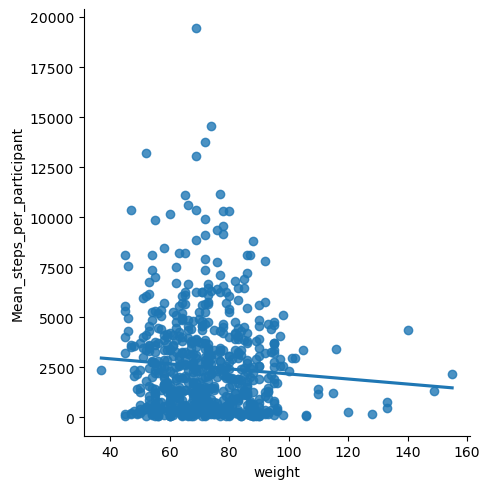

In [66]:
trainingData, testData = train_test_split(dfDummies, test_size=0.2)

sns.lmplot(x="weight", y="mean_steps", data=trainingData, ci=False)
plt.xlabel("weight")
plt.ylabel("Mean_steps_per_participant")
plt.show()

Description of the above plot:


1. The data seem to fit a linear pattern: you can draw a straight line to fit the points
2. Most part participant's weight lie between 45 and 95kg.
3. There are a few outliers above 100 kg.
4. Most average steps lie around 700 steps.
5. There is quite a bit of variation around this line. Some points will be above it, some below.
6. This variation seems to decrease the higher the weight of the participant.
7. Outliers: 60000 steps seems quite far compared to the rest of data.

In [68]:
# independed variable
x = testData[["education_1_Bachelor", "education_1_High school", "education_1_Master or doctorate", "education_1_No degree", "education_1_Primary", "education_1_Vocational", "city_Bordeaux", "city_Lille", "city_Lyon", "city_Montpellier", "gender_Female", "gender_Male"]]

# dependent variable
y = testData["mean_steps"]

# create a model -  create an object and store it in lm (linear model) variable 
lm = LinearRegression()
lm.fit(x,y)

testData["mean_steps_predict"] = lm.predict(x)


# show all columns
testData.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Evaluation

Evaluate the model on the test data 

Predictive power of the model (R2, RMSE)

In [ ]:
r2_score(testData['mean_steps'], testData['mean_steps_predict']) #this gives the model fit (R2) for the Y and predicted Y


0.06166724451074379

The R^2 is 0,06, which means 6% of the variation in mean steps is explained by the model which seems really bad?

In [ ]:
import math

math.sqrt(mean_squared_error(testData["mean_steps"], testData["mean_steps_predict"]))

3161.260923527397

Investigate the residuals

In [ ]:
testData['resid'] = testData['mean_steps'] - testData['mean_steps_predict'] #get the residuals by subtracting the prediction from the actual views
testData['resid'].describe()

count    1.860000e+02
mean    -5.892157e-13
std      3.169793e+03
min     -7.475733e+03
25%     -2.116392e+03
50%     -2.011833e+02
75%      1.632611e+03
max      1.567662e+04
Name: resid, dtype: float64

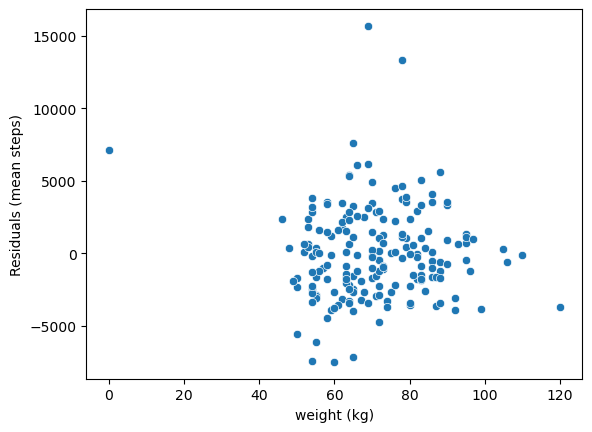

In [ ]:
sns.scatterplot(x='weight',y='resid',data=testData)
plt.xlabel('weight (kg)')
plt.ylabel('Residuals (mean steps)')
plt.show()

### Conclusion 

The model's performance as evaluated by the r2 score is very low (0.06). The root mean squared error of the residuals is quite high at 3161.26. The descriptive statistics of the residuals showed the model is not working well as there's a wide range of values including a negative mean. 